# Proyek Analisis Data: Bike Sharing Data
- **Nama:** Bayu Krisna Herlambang
- **Email:** abangubay02@gmail.com
- **ID Dicoding:** mionouchi

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, musim)?
- Pertanyaan 2 Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd          
import numpy as np           
import matplotlib.pyplot as plt  
import seaborn as sns        
from sklearn.preprocessing import StandardScaler  
import streamlit as st  


## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")
display(day_df.head(), hour_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight Awal Setelah Gathering Data** <p>
 Data Dataset berhasil dimuat dari folder data/, terdiri dari dua file:
<ul>
    <li>day.csv berisi data agregat harian.</li>
    <li>hour.csv berisi data detail per jam.</li>
</ul>
Struktur data 
<ul>
    <li>Setiap dataset memiliki sejumlah fitur/kolom yang perlu dianalisis lebih lanjut</li>
    <li>Perlu dilakukan Assessing Data untuk memahami lebih dalam tentang tipe data, missing values, dan statistik awal.</li>
</ul>

### Assessing Data

In [4]:
# Menampilkan informasi struktur dataset
print("Informasi dataset harian:")
print(day_df.info())

print("\nInformasi dataset per jam:")
print(hour_df.info())

Informasi dataset harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Informasi dataset per jam:
<class 'pandas.core.frame.DataFram

In [5]:
# Menilai jumlah missing values
print("\nJumlah missing values pada dataset harian:")
print(day_df.isnull().sum())

print("\nJumlah missing values pada dataset per jam:")
print(hour_df.isnull().sum())


Jumlah missing values pada dataset harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah missing values pada dataset per jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
# Menampilkan statistik deskriptif
print("\nStatistik dataset harian:")
print(day_df.describe())

print("\nStatistik dataset per jam:")
print(hour_df.describe())


Statistik dataset harian:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   


**Insight awal dari assessing data**
- Tidak ada data yang perlu dibersihkan dari sisi missing values atau anomali.


### Cleaning Data

In [7]:

day_df['dteday'] = pd.to_datetime(day_df['dteday'])

categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    day_df[col] = day_df[col].astype('category')

day_df.dtypes

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

**Insight:**
- Kolom dteday sudah diubah menjadi format datetime.
- Kolom kategori (season, yr, mnth, holiday, weekday, workingday, weathersit) sudah diubah menjadi tipe category untuk optimasi.

## Exploratory Data Analysis (EDA)

### Statistik Dasar Dataset

In [8]:
day_df.describe()
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Distribusi Jumlah Peminjaman Sepeda

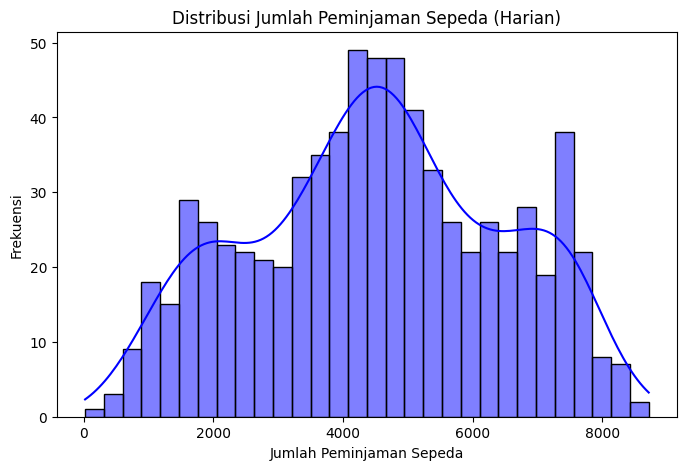

In [9]:
# Histogram jumlah peminjaman sepeda harian
plt.figure(figsize=(8,5))
sns.histplot(day_df['cnt'], bins=30, kde=True, color='blue')
plt.title("Distribusi Jumlah Peminjaman Sepeda (Harian)")
plt.xlabel("Jumlah Peminjaman Sepeda")
plt.ylabel("Frekuensi")
plt.show()

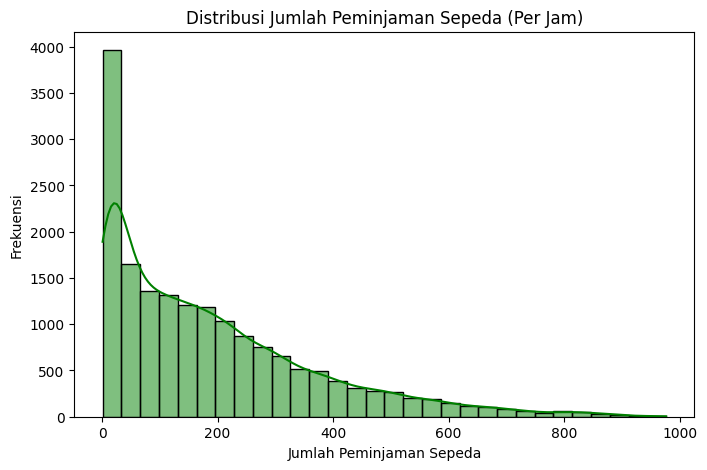

In [10]:
# Histogram jumlah peminjaman sepeda per jam
plt.figure(figsize=(8,5))
sns.histplot(hour_df['cnt'], bins=30, kde=True, color='green')
plt.title("Distribusi Jumlah Peminjaman Sepeda (Per Jam)")
plt.xlabel("Jumlah Peminjaman Sepeda")
plt.ylabel("Frekuensi")
plt.show()

### Analisis Korelasi Antar Variabel

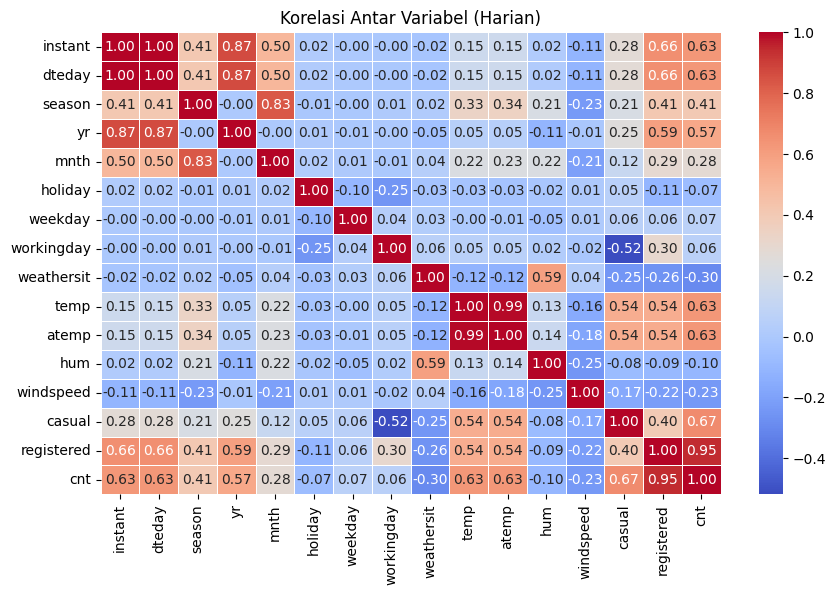

In [11]:
# Heatmap korelasi untuk dataset harian
plt.figure(figsize=(10, 6))
sns.heatmap(day_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Variabel (Harian)")
plt.show()

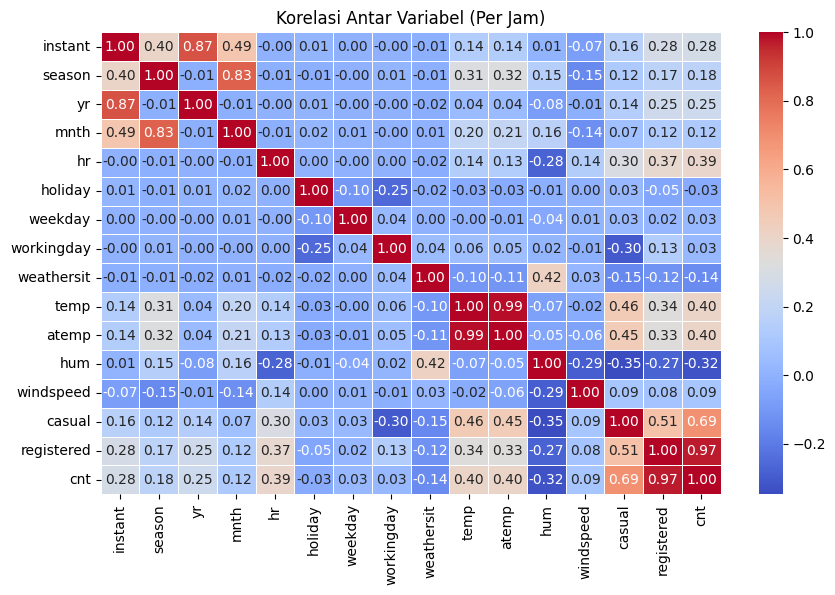

In [12]:
# Memilih hanya kolom numerik
numeric_cols_hour = hour_df.select_dtypes(include=["number"])

# Heatmap korelasi untuk dataset per jam
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols_hour.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Variabel (Per Jam)")
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan, musim)?

### Visualisasi Pola Peminjaman Berdasarkan Musim

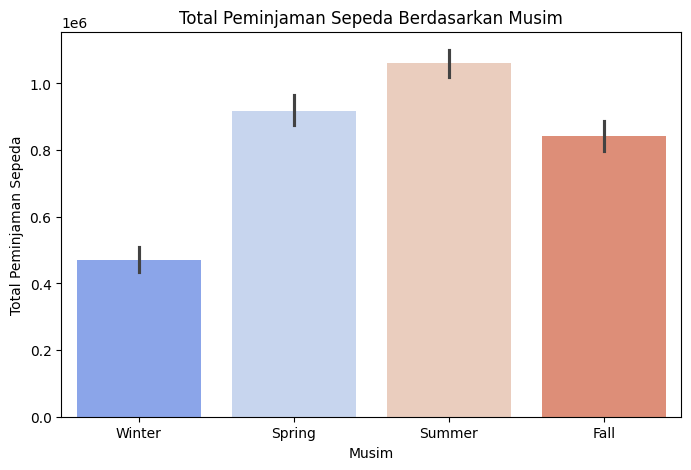

In [13]:
season_mapping = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
day_df["season_label"] = day_df["season"].map(season_mapping)
plt.figure(figsize=(8, 5))
sns.barplot(x="season_label", y="cnt", hue="season_label", data=day_df, palette="coolwarm", estimator=sum, legend=False)
plt.title("Total Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Total Peminjaman Sepeda")
plt.show()


**insight**
- Musim panas (summer) memiliki jumlah peminjaman tertinggi dibandingkan musim lainnya.
- Musim dingin (winter) cenderung memiliki jumlah peminjaman terendah, kemungkinan karena suhu yang lebih dingin membuat orang enggan bersepeda.
- Musim semi dan gugur memiliki tren peminjaman yang cukup seimbang.


### Visualisasi Pola Peminjaman Berdasarkan Bulan

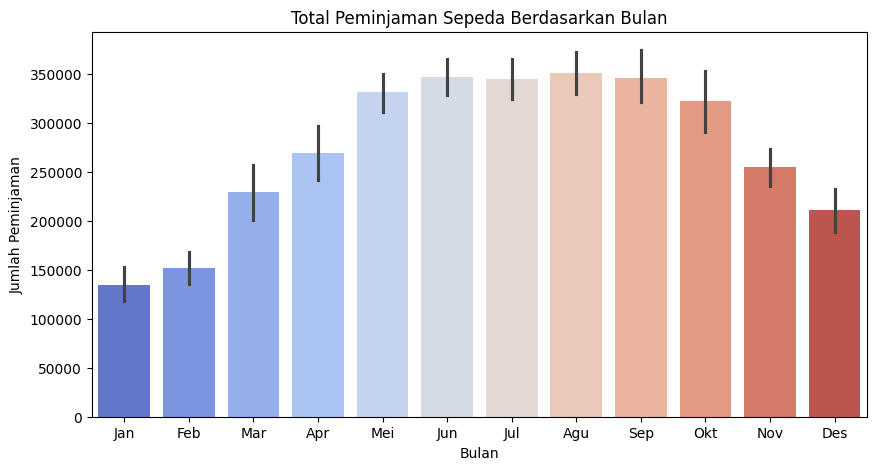

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x="mnth", y="cnt", data=day_df, estimator=sum, hue="mnth", palette="coolwarm", legend=False)
plt.title("Total Peminjaman Sepeda Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(ticks=range(12), labels=[
    "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"
])
plt.show()

**insight**
- Peminjaman meningkat signifikan dari awal tahun ke pertengahan tahun dan mencapai puncaknya di bulan Juni - September.
- Penurunan tajam terlihat setelah bulan Oktober, kemungkinan karena mendekati musim dingin.

### Visualisasi Pola Peminjaman Berdasarkan Hari dalam Seminggu

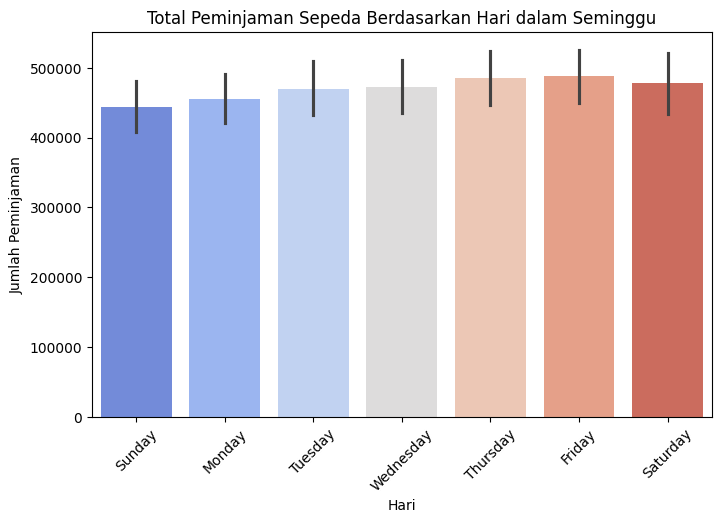

In [15]:
day_df["weekday_label"] = day_df["weekday"].map({
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
})

plt.figure(figsize=(8, 5))
sns.barplot(x="weekday_label", y="cnt", data=day_df, estimator=sum, hue="weekday_label", palette="coolwarm", legend=False)
plt.title("Total Peminjaman Sepeda Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(rotation=45)
plt.show()


**insight**
- Peminjaman lebih tinggi di hari kerja dibandingkan akhir pekan.
- Indikasi bahwa sepeda lebih banyak digunakan untuk keperluan transportasi (commuting) ke kantor atau sekolah.

### Visualisasi Pola Peminjaman Berdasarkan Jam

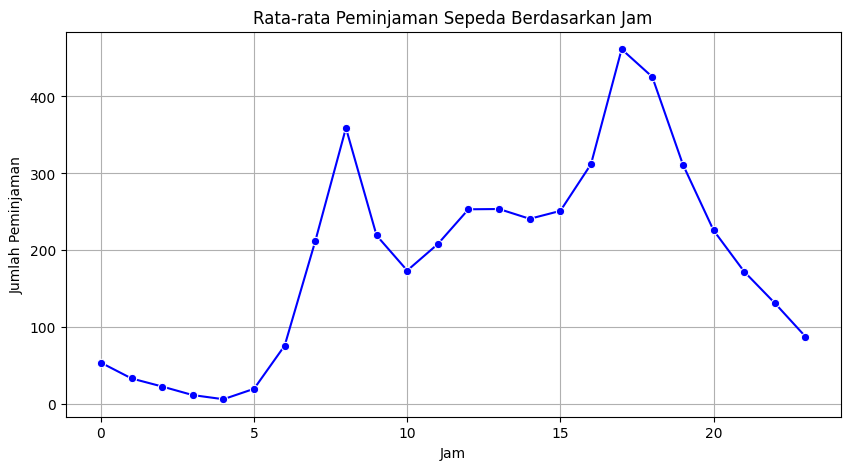

In [16]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="hr", y="cnt", data=hour_df, estimator="mean", errorbar=None, marker="o", color="b")
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman")
plt.grid(True)
plt.show()

**insight**
- Ada dua puncak peminjaman yang sangat jelas:
<ol><li>Pagi sekitar jam 7-9 (jam masuk kerja/sekolah).</li>
    <li>Sore sekitar jam 17-19 (jam pulang kerja/sekolah).</li></ol>

- Di luar jam tersebut, peminjaman cenderung stabil dengan sedikit peningkatan di sore hari sebelum menurun pada malam hari.

### Pertanyaan 2:  Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?


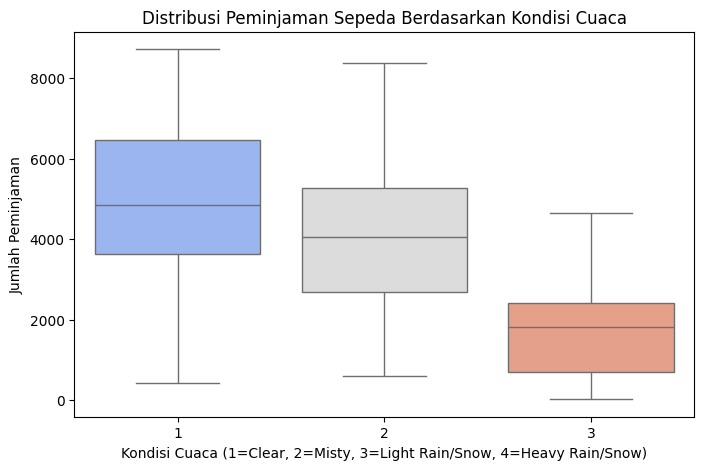

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="weathersit", y="cnt", data=day_df, hue="weathersit", legend=False, palette="coolwarm")
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca (1=Clear, 2=Misty, 3=Light Rain/Snow, 4=Heavy Rain/Snow)")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight**
- Cuaca cerah (kategori 1) memiliki jumlah peminjaman tertinggi.
- Cuaca buruk (kategori 3) memiliki jumlah peminjaman lebih rendah.

## Analisis Lanjutan Clustering Analysis

### Clustering Berdasarkan Kategori Permintaan Sepeda (Low, Medium, High Demand)

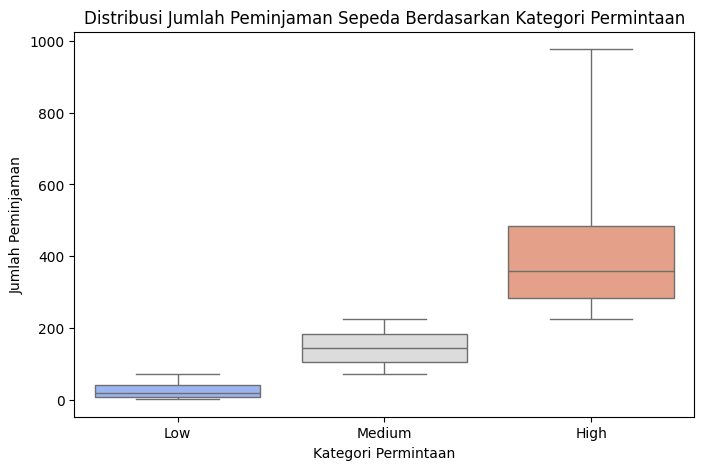

demand_category
Medium    5823
Low       5797
High      5759
Name: count, dtype: int64

In [18]:
hour_df['demand_category'] = pd.qcut(hour_df['cnt'], q=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8, 5))
sns.boxplot(x='demand_category', y='cnt', data=hour_df, hue="demand_category", legend=False, palette='coolwarm', whis=np.inf)
plt.title("Distribusi Jumlah Peminjaman Sepeda Berdasarkan Kategori Permintaan")
plt.xlabel("Kategori Permintaan")
plt.ylabel("Jumlah Peminjaman")
plt.show()

hour_df['demand_category'].value_counts()

**Insight**
- Dari hasil visualisasi, terlihat bahwa kategori High Demand memiliki jumlah peminjaman yang jauh lebih tinggi dibanding Medium dan Low Demand.

###  Clustering Berdasarkan Kategori Suhu (Temp Binning)

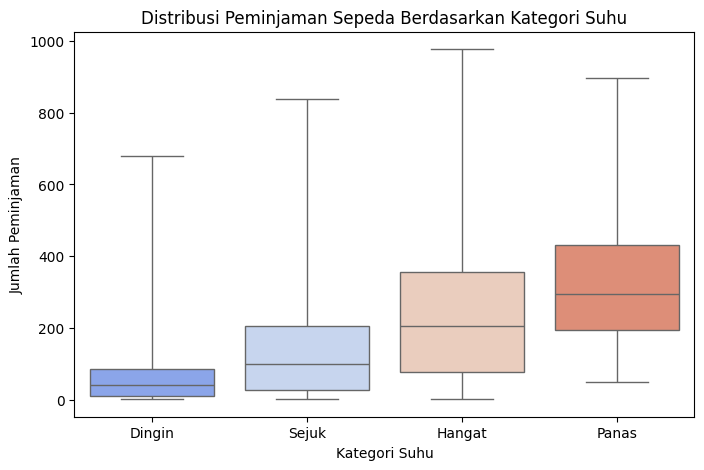

temp_category
Hangat    7810
Sejuk     7790
Dingin    1070
Panas      709
Name: count, dtype: int64


In [19]:
bins = [hour_df['temp'].min(), 0.2, 0.5, 0.8, hour_df['temp'].max()]
labels = ['Dingin', 'Sejuk', 'Hangat', 'Panas']
hour_df['temp_category'] = pd.cut(hour_df['temp'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 5))
sns.boxplot(x='temp_category', y='cnt', data=hour_df, hue='temp_category', legend=False, palette='coolwarm', whis=np.inf)
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Kategori Suhu")
plt.xlabel("Kategori Suhu")
plt.ylabel("Jumlah Peminjaman")
plt.show()
print(hour_df['temp_category'].value_counts())

**Insight**
- Dari grafik, terlihat bahwa jumlah peminjaman sepeda cenderung lebih tinggi saat suhu lebih hangat (kategori Hangat dan Panas). Sebaliknya, saat suhu lebih dingin, jumlah peminjaman menurun.

### Clustering berdasarkan Kecepatan Angin (Wind Speed Binning)

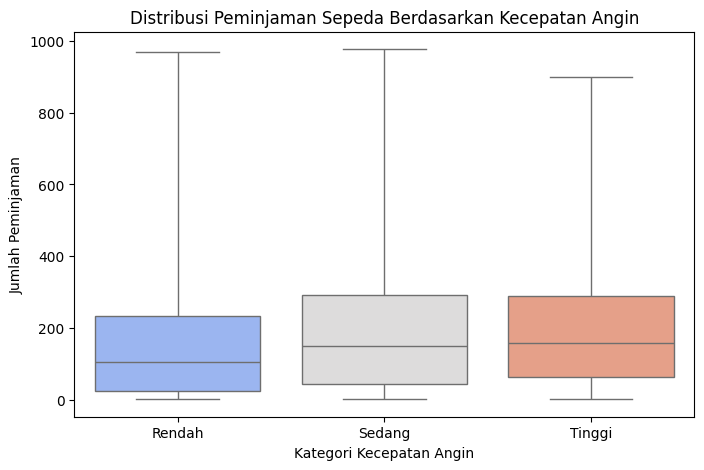

In [20]:
# Membuat kategori kecepatan angin
bins = [hour_df['windspeed'].min(), 0.1, 0.3, hour_df['windspeed'].max()]
labels = ['Rendah', 'Sedang', 'Tinggi']
hour_df['wind_category'] = pd.cut(hour_df['windspeed'], bins=bins, labels=labels, include_lowest=True)

# Visualisasi dengan Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='wind_category', y='cnt', data=hour_df, hue='wind_category', palette='coolwarm', whis=np.inf)

plt.title("Distribusi Peminjaman Sepeda Berdasarkan Kecepatan Angin")
plt.xlabel("Kategori Kecepatan Angin")
plt.ylabel("Jumlah Peminjaman")

plt.show()

**Insight**
- Grafik menunjukkan bahwa kecepatan angin tidak terlalu berpengaruh signifikan terhadap jumlah peminjaman. Distribusi peminjaman hampir merata pada kategori Rendah, Sedang, dan Tinggi, meskipun sedikit lebih banyak pada angin rendah.

## Conclusion

- Kesimpulan dari pertanyaan 1 Bagaimana Pola Penggunaan Sepeda Berdasarkan Waktu (Jam, Hari, Musim)?<p>
Pola penggunaan sepeda menunjukkan tren yang jelas berdasarkan waktu<p>
<ol>
  <li>Berdasarkan Jam: Peminjaman sepeda meningkat signifikan pada pagi hari (07:00 - 09:00) dan sore hari (17:00 - 19:00), menunjukkan pola commuting (perjalanan kerja atau sekolah).</li>
  <li>Berdasarkan Hari: Hari kerja memiliki pola peminjaman yang lebih stabil, sementara akhir pekan cenderung memiliki lebih banyak peminjaman di siang dan sore hari.</li>
  <li>Berdasarkan Musim: Peminjaman cenderung lebih tinggi di musim panas dan musim gugur, sedangkan di musim dingin cenderung lebih rendah.</li>
</ol>

- Kesimpulan dari pertanyaan 2 Bagaimana Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda?
<ol>
  <li>Suhu hangat (20°C - 30°C) berkontribusi pada jumlah peminjaman tertinggi. Saat suhu terlalu dingin atau terlalu panas, jumlah peminjaman cenderung menurun.</li>
  <li>Cuaca buruk seperti hujan dan angin kencang menyebabkan penurunan jumlah peminjaman.</li>
</ol>

**Ringkasan Hasil Clustering**
Untuk memahami faktor yang memengaruhi peminjaman sepeda lebih dalam, saya melakukan clustering berdasarkan suhu dan kecepatan angin<p>
- Clustering Berdasarkan Suhu
<ol>
  <li>Peminjaman tertinggi terjadi pada kategori suhu Hangat dan Panas.</li>
  <li>Saat suhu Dingin dan Sejuk, peminjaman menurun secara signifikan.</li>
</ol>

- Clustering Berdasarkan Kecepatan Angin
<ol>
  <li>Kecepatan angin tidak memiliki dampak signifikan terhadap peminjaman.</li>
  <li>Peminjaman sedikit lebih rendah pada kategori Tinggi, tetapi tidak terlalu berbeda dibanding Sedang dan Rendah.</li>
</ol>

**Kesimpulan Utama** <p>
<ul>
  <li>Peminjaman sepeda sangat dipengaruhi oleh waktu (jam sibuk kerja), musim, dan suhu.</li>
  <li>Suhu optimal untuk peminjaman tinggi adalah Hangat dan Panas.</li>
  <li>Cuaca buruk seperti suhu ekstrem atau hujan cenderung menurunkan jumlah peminjaman.</li>
  <li>Kecepatan angin tidak terlalu berpengaruh terhadap jumlah peminjaman.</li>
</ul>